In [1]:
#K-NN botwiki-verified

import pandas as pd
import numpy as np
import json

bot_labels = pd.read_csv('botwiki-2019.tsv', names = ['id', 'identity'], sep = '\t')
human_labels = pd.read_csv('verified-2019.tsv', names = ['id', 'identity'], sep = '\t')
bot_labels['bot'] = 1
human_labels['bot'] = 0


#convert json to DataFrame
file = open('botwiki-2019_tweets.json')
file1 = open('verified-2019_tweets.json')
jsn = json.load(file)
jsn1 = json.load(file1)
bot_accounts = pd.DataFrame(pd.json_normalize(jsn))
human_accounts = pd.DataFrame(pd.json_normalize(jsn1))
bot_accounts = bot_accounts.merge(bot_labels, left_on=bot_accounts['user.id'], right_on=bot_labels['id'])
human_accounts = human_accounts.merge(human_labels, left_on=human_accounts['user.id'], right_on=human_labels['id'])
accounts = bot_accounts.append(human_accounts)
accounts.to_csv('accounts.csv')



# import train_test_split
from sklearn.model_selection import train_test_split

#Creating test train split for knn
X = accounts[['user.followers_count', 'user.friends_count', 'user.listed_count', 'user.favourites_count', ]].to_numpy()
y = accounts[['bot']].to_numpy()

 
# make the test data 25% of the total data
# Set a random seed
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=440)

# import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

# Make the model
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the model
knn.fit(X_train,y_train.ravel())

# Make a prediction on our train set
y_predict = knn.predict(X_train)

# calculate the accuracy here
# sum a list of booleans and True gets cast as 1
# False gets cast as 0
print("Our model has a ",
      np.round(sum(y_predict == y_train.ravel())/len(y_train)*100,2),
      "% accuracy on the training set")


Our model has a  98.46 % accuracy on the training set


In [2]:
#K-NN cumulative

cumulative_raw_data = pd.read_csv("Cumulative_Raw_Data.csv")


#Creating test train split for knn
X = cumulative_raw_data[['followers_count', 'friends_count', 'listed_count', 'favourites_count', ]].to_numpy()
y = cumulative_raw_data[['species']].to_numpy()

 
# make the test data 25% of the total data
# Set a random seed
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=440)

# import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

# Make the model
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the model
knn.fit(X_train,y_train.ravel())


y_predict = knn.predict(X_test)

# calculate the accuracy here
# sum a list of booleans and True gets cast as 1
# False gets cast as 0
print("Our model has a ",
      np.round(sum(y_predict == y_test.ravel())/len(y_test)*100,2),
      "% accuracy on the testing set")


/Users/nikolasmcneal/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Our model has a  86.53 % accuracy on the testing set


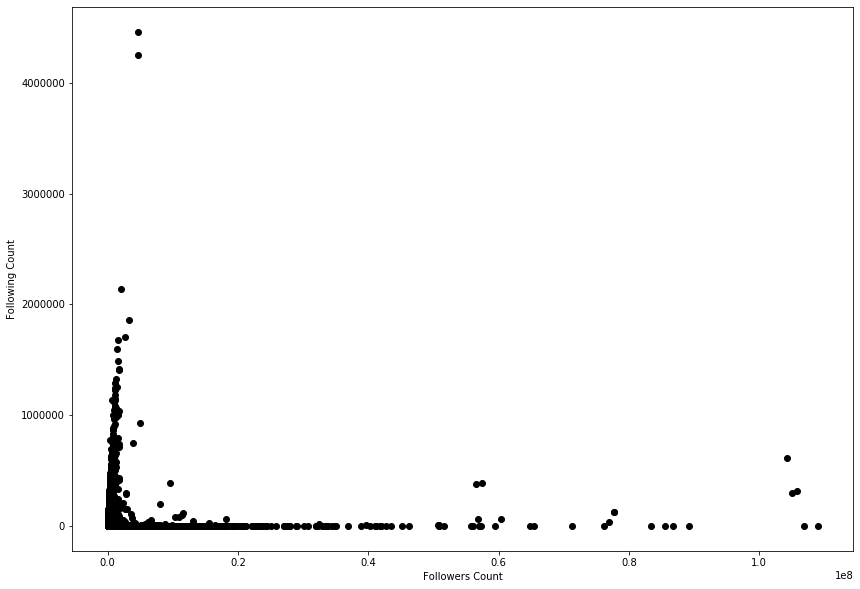

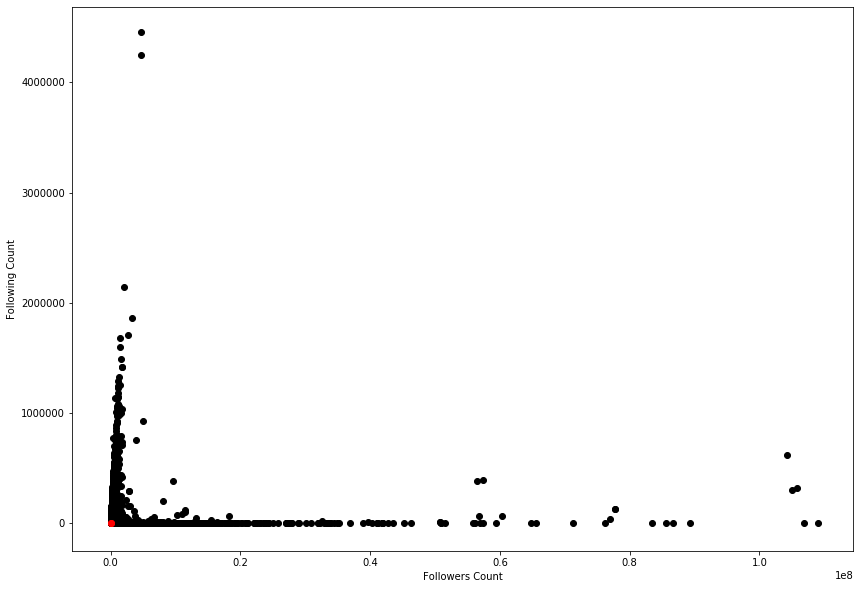

2167750.7698844885
2521233.0194817483
4047186.50421522
5457512.232314805
6300894.802737072
6673070.172238813
6115617.5038913665
6223477.536928767
4574291.381607652
2573896.3585069235
1929263.493573523
1398506.7545054997
360109.16749142983
0.0


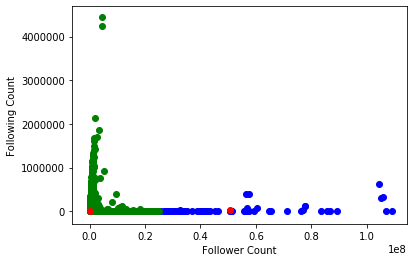

In [38]:
#K Means Clustering with 2 variables (Working, only 2 variables, visualized)

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

data = pd.read_csv('Cumulative_Raw_Data.csv')

#General Plot
plt.figure(figsize=(14,10))
X = data[["followers_count","friends_count"]]
data = pd.read_csv('Cumulative_Raw_Data.csv')
plt.scatter(X["followers_count"],X["friends_count"],c='black')
plt.xlabel('Followers Count')
plt.ylabel('Following Count')
plt.show()

#Plot with K Centroids
#number of clusters
K=2
Centroids = (X.sample(n=K))
plt.figure(figsize=(14,10))
plt.scatter(X["followers_count"],X["friends_count"],c='black')
plt.scatter(Centroids["followers_count"],Centroids["friends_count"],c='red')
plt.xlabel('Followers Count')
plt.ylabel('Following Count')
plt.show()

#clustering work

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1 
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["followers_count"]-row_d["followers_count"])**2
            d2=(row_c["friends_count"]-row_d["friends_count"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["friends_count","followers_count"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['friends_count'] - Centroids['friends_count']).sum() + (Centroids_new['followers_count'] - Centroids['followers_count']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["followers_count","friends_count"]]
    

#Visualized K Means Clustering   
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["followers_count"],data["friends_count"],c=color[k])
plt.scatter(Centroids["followers_count"],Centroids["friends_count"],c='red')
plt.xlabel('Follower Count')
plt.ylabel('Following Count')
plt.show()


In [36]:
#failed attempt at clustering -- IGNORE
"""
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Cumulative_Raw_Data.csv')
data.drop(data.columns.difference(['followers_count','friends_count', 'listed_count', 'favourites_count']), 1, inplace=True)
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X)
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))
"""

0.0


In [ ]:
##K Means Clustering -- Multivariate Attempt(UNUSED, will not load)

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

data = pd.read_csv('Cumulative_Raw_Data.csv')

#General Plot
plt.figure(figsize=(14,10))
X = data[["followers_count","friends_count","listed_count"]]
data = pd.read_csv('Cumulative_Raw_Data.csv')
plt.scatter(X["followers_count"],X["friends_count"],X["listed_count"],c='black')


#number of clusters
K=3
Centroids = (X.sample(n=K))
plt.scatter(Centroids["followers_count"],Centroids["friends_count"],Centroids["listed_count"],c='red')


#clustering work

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1 
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["followers_count"]-row_d["followers_count"])**2
            d2=(row_c["friends_count"]-row_d["friends_count"])**2
            d3=(row_c["listed_count"]-row_d["listed_count"])**2
            d=np.sqrt(d1+d2+d3)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["friends_count","followers_count","listed_count"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['friends_count'] - Centroids['friends_count']).sum() + (Centroids_new['followers_count'] - Centroids['followers_count']) + (Centroids_new['listed_count'] - Centroids['listed_count']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["followers_count","friends_count","listed_count"]]
    

#Visualized K Means Clustering (2-dimensional)

color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["followers_count"],data["friends_count"],c=color[k])
plt.scatter(Centroids["followers_count"],Centroids["friends_count"],c='red')
plt.xlabel('Follower Count')
plt.ylabel('Following Count')
plt.show()


/Users/nikolasmcneal/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


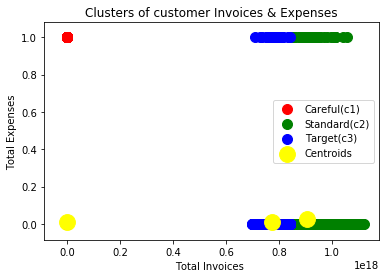

In [8]:
# Attempt at Multivariate Clustering -- UNUSED


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

data=pd.read_csv('Cumulative_Raw_Data.csv')
X=data.iloc[: , [0,4]].values
data.drop(data.columns.difference(['followers_count','friends_count', 'listed_count', 'favourites_count']), 1, inplace=True)

kmeans=KMeans(n_clusters=3, init='k-means++', max_iter= 300, n_init= 10, random_state= 0)
y_kmeans=kmeans.fit_predict(X)


# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label='Careful(c1)')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label='Standard(c2)')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label='Target(c3)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = 'yellow', 
            label='Centroids')
plt.title('Clusters of customer Invoices & Expenses')
plt.xlabel('Total Invoices ')
plt.ylabel('Total Expenses')
plt.legend()
plt.show()

/Users/nikolasmcneal/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


IndexError: index 3 is out of bounds for axis 1 with size 2

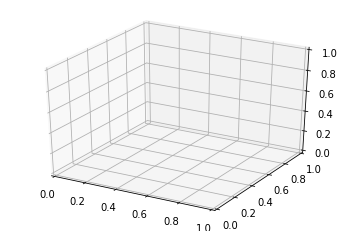

In [90]:
#Attempt at 3D -- UNUSED

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Load Data
data=pd.read_csv('Cumulative_Raw_Data.csv')
data.drop(data.columns.difference(['followers_count','friends_count', 'listed_count', 'favourites_count']), 1, inplace=True)
km = KMeans(2)
clusts = km.fit_predict(X)

#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
            km.cluster_centers_[:, 3],
            km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='red',
            label='centroids')
scatter = ax.scatter(data['followers_count'],data['friends_count'], data['favourites_count'],
                     c=clusts, s=20, cmap='winter')
ax.set_title('K-Means Clustering')
ax.set_xlabel('1 Width')
ax.set_ylabel('0 Length')
ax.set_zlabel('1')
ax.legend()
plt.show()

In [78]:
#Clustering Take 2 FINAL -- Cumulative

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('Cumulative_Raw_Data.csv')
df.drop(df.columns.difference(['followers_count','friends_count', 'listed_count', 'favourites_count', 'statuses_count', 'species']), 1, inplace=True)


def handle_non_numerical_data(df):
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)

X = np.array(df.drop(['species'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['species'])

clf = KMeans(n_clusters=2)
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))


/Users/nikolasmcneal/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0.3633815450162574


In [77]:
#Clustering Take 2 FINAL -- botwiki-verified

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.cluster import KMeans


df = pd.read_csv('accounts.csv')
df.drop(df.columns.difference(['user.followers_count','user.friends_count', 'user.listed_count', 'user.favourites_count', 'bot']), 1, inplace=True)
df.fillna(0, inplace=True)
def handle_non_numerical_data(df):
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)

X = np.array(df.drop(['bot'], 1).astype(float))
y = np.array(df['bot'])


clf = KMeans(n_clusters=2)
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))


0.7374301675977654
